In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-white')

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
df = pd.read_csv('titanic_grupo2.csv')

df.head()
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa Etaria
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(15, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(25, 60]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(25, 60]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(25, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(25, 60]"


# MODELAGEM

- Testar modelos
- Avaliar modelos

kNN - k-Nearest Neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
variaveis_que_nao_vamos_usar = ['Name', 'Ticket']

df_limpo = df.drop(variaveis_que_nao_vamos_usar, axis=1)

In [8]:
# faixa etaria para grupos ordinais

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

variavel_encodar = ['Faixa Etaria']

faixas_etarias = le.fit_transform(df_limpo[variavel_encodar])

df_limpo.loc[:, 'Faixa Etaria'] = faixas_etarias

C:\ProgramData\Anaconda3\envs\DSUFES\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
df_limpo

# tratar sexo

# df['Sex'].apply(lambda x: 1 if x == 'male' else 0)


def trata_genero(genero):

    return 1 if genero == 'male' else 0


df_limpo['Sex'] = df_limpo['Sex'].apply(trata_genero)

In [10]:
def trata_embarked(embarked):

    if embarked == 'S':
        return 1
    return 2 if embarked == 'C' else 3


df_limpo['Embarked'] = df_limpo['Embarked'].apply(trata_embarked)

In [11]:
df_limpo.set_index("PassengerId", inplace=True)

In [12]:
# def trata_faixa_etaria(faixa):

#     faixas = df_limpo['Faixa Etarira'].value_counts().index

#     if faixa == '(0, 15]':
#         return 1
#     if faixa == '(15, 25]':
#         return 2
#     return 3 if faixa == '(25, 60]' else 4

# df_limpo['Faixa Etarira'] = df_limpo['Faixa Etarira'].apply(trata_faixa_etaria)

In [13]:
df_limpo['Faixa Etaria'].value_counts().index

Int64Index([2, 1, 0, 3], dtype='int64')

In [14]:
df_limpo.dtypes

Survived          int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked          int64
Faixa Etaria      int32
dtype: object

## KNN

In [15]:
# perform knn classifier

knn = KNeighborsClassifier(n_neighbors=3)

X = df_limpo.drop("Survived", axis=1)
y = df_limpo['Survived']

In [16]:
#treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
X_test.iloc[3:4]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa Etaria
PassengerId,,,,,,,,
721,2,0,6.0,0,1,33.0,1,0


In [19]:
knn.predict(X_test.iloc[3:4])

array([0], dtype=int64)

In [20]:
y_test.iloc[3:4]

PassengerId
721    1
Name: Survived, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [22]:
# confusion matrix

confusion_matrix(y_test, knn.predict(X_test))

array([[94, 11],
       [39, 35]], dtype=int64)

C:\ProgramData\Anaconda3\envs\DSUFES\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


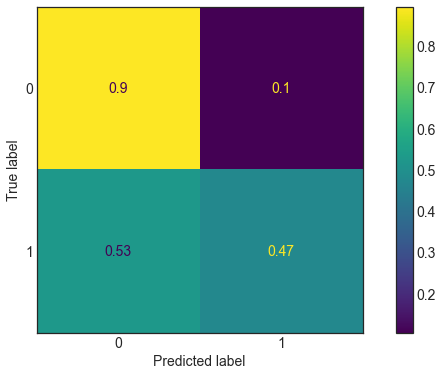

In [23]:
import matplotlib.pyplot as plt

# fig, ax = plt.figure(figsize=(12,8))
plot_confusion_matrix(estimator=knn,
                      X=X_test,
                      y_true=y_test,
                      display_labels=['0', '1'],
                      normalize='true')

In [24]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       105
           1       0.76      0.47      0.58        74

    accuracy                           0.72       179
   macro avg       0.73      0.68      0.69       179
weighted avg       0.73      0.72      0.70       179



## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
print(classification_report(y_test, dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



C:\ProgramData\Anaconda3\envs\DSUFES\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


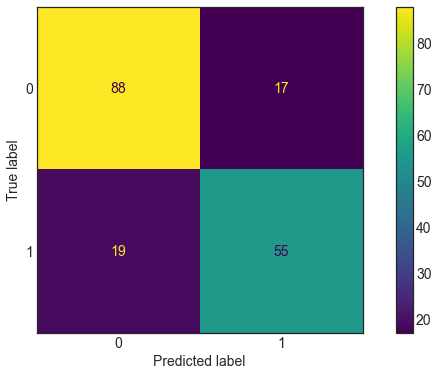

In [27]:
plot_confusion_matrix(dtree, X_test, y_test, display_labels=['0', '1'])

In [28]:
# visualize tree

# plt.figure(figsize=(50, 40))

# plot_tree(dtree,
#           feature_names=X_train.columns,
#           class_names=['0', '1'],
#           filled=True)

# plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

In [31]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



C:\ProgramData\Anaconda3\envs\DSUFES\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


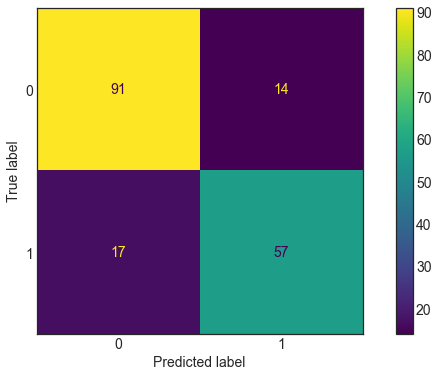

In [32]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['0', '1'])

In [33]:
# feature importance

pd.DataFrame({
    'importances': rf.feature_importances_,
    'features': X_train.columns
})

,importances,features
0,0.078498,Pclass
1,0.258494,Sex
2,0.218644,Age
3,0.054890,SibSp
4,0.035649,Parch
5,0.279378,Fare
6,0.034472,Embarked
7,0.039974,Faixa Etaria


In [34]:
#regressao logistica

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\DSUFES\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [36]:
df_limpo['Embarked']

PassengerId
1      1
2      2
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    2
891    3
Name: Embarked, Length: 891, dtype: int64

In [37]:
df_limpo

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa Etaria
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,1
2,1,1,0,38.0,1,0,71.2833,2,2
3,1,3,0,26.0,0,0,7.9250,1,2
4,1,1,0,35.0,1,0,53.1000,1,2
5,0,3,1,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,1,2
888,1,1,0,19.0,0,0,30.0000,1,1
889,0,3,0,28.0,1,2,23.4500,1,2


In [38]:
categorical_cols = ['Embarked', 'SibSp', 'Parch', 'Faixa Etaria']

#import pandas as pd
df_limpo_dummies = pd.get_dummies(df_limpo, columns=categorical_cols)

In [39]:
#OneHotEncoder

In [40]:
df_limpo_dummies.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_1', 'Embarked_2',
       'Embarked_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Faixa Etaria_0', 'Faixa Etaria_1',
       'Faixa Etaria_2', 'Faixa Etaria_3'],
      dtype='object')

In [41]:
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(
    df_limpo_dummies.drop("Survived", 1),
    df_limpo_dummies['Survived'],
    test_size=0.2,
    random_state=42)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12748\462789160.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_limpo_dummies.drop("Survived", 1),


In [42]:
rf.fit(X_train_dummies, y_train_dummies)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

C:\ProgramData\Anaconda3\envs\DSUFES\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


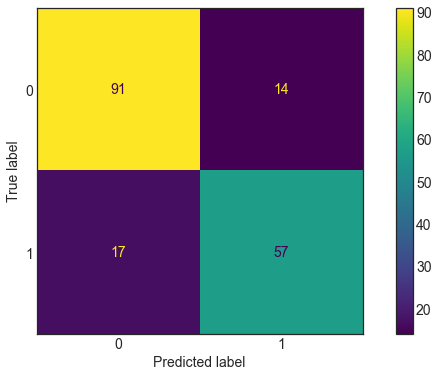

In [43]:
plot_confusion_matrix(rf,
                      X_test_dummies,
                      y_test_dummies,
                      display_labels=['0', '1'])

In [44]:
print(classification_report(y_test_dummies, rf.predict(X_test_dummies)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [45]:
# catboost

In [46]:
# grid search
# random search

# hyperparameter tuning

# cross-validation (k-fold)